In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
away_team = pd.read_csv("E:\\New folder\\tables\\tables\\away_team.csv")
away_team_score = pd.read_csv("E:\\New folder\\tables\\tables\\away_team_score.csv")
event = pd.read_csv("E:\\New folder\\tables\\tables\\event.csv")
home_team = pd.read_csv("E:\\New folder\\tables\\tables\\home_team.csv")
home_team_score = pd.read_csv("E:\\New folder\\tables\\tables\\home_team_score.csv")
odds =  pd.read_csv("E:\\New folder\\tables\\tables\\odds.csv")
power = pd.read_csv("E:\\New folder\\tables\\tables\\power.csv")
round = pd.read_csv("E:\\New folder\\tables\\tables\\round.csv")
season = pd.read_csv("E:\\New folder\\tables\\tables\\season.csv")
statistics = pd.read_csv("E:\\New folder\\tables\\tables\\statistics.csv")
time = pd.read_csv("E:\\New folder\\tables\\tables\\time.csv")
tournament = pd.read_csv("E:\\New folder\\tables\\tables\\tournament.csv")
venue = pd.read_csv("E:\\New folder\\tables\\tables\\venue.csv")
votes = pd.read_csv("E:\\New folder\\tables\\tables\\votes.csv")
pbp =  pd.read_csv("E:\\New folder\\tables\\tables\\pbp.csv") 

1. How many tennis players are included in the dataset?


In [6]:

folder_path = "E:/New folder/tables/tables"

table_names = [
    "away_team", "event", "home_team", "odds", "power",
    "round", "season", "statistics", "time", "tournament",
    "venue", "votes", "pbp", "home_team_score", "away_team_score"
]

player_id = []

# Read any CSV file, remove duplicate rows, and add the 'player_id' column to the list
for table_name in table_names:
    file_path = f"{folder_path}/{table_name}.csv"
    df = pd.read_csv(file_path)
    df = df.drop_duplicates()  # Remove duplicate rows
    if 'player_id' in df.columns:
        player_id.extend(df['player_id'].dropna().unique())

# Convert the list to a set to remove duplicates
unique_players = set(player_id)

print(f"Number of unique tennis players: {len(unique_players)}")


Number of unique tennis players: 2352


2. What is the average age of the players?


In [7]:
combined_df = pd.concat([home_team, away_team], ignore_index=True).drop_duplicates()

# Calculate the average height of the players
average_height = combined_df['height'].mean()
print(f"Team height of players (cm): {average_height}")


Team height of players (cm): 1.819405199001322


3. Which player has the highest number of wins?


In [64]:

df_away_team = away_team.drop_duplicates(subset='match_id')
df_pbp = pbp.drop_duplicates(subset='match_id')
df_home_team = home_team.drop_duplicates(subset='match_id')

merged_data = pd.merge(df_away_team, df_pbp, on='match_id')

#Calculate the number of wins for each player
def calculate_wins(row):
    if row['home_score'] > row['away_score']:
        return row['home_point']
    else:
        return row['away_point']

merged_data['wins'] = merged_data.apply(calculate_wins, axis=1)

player_with_most_wins_id = merged_data.groupby('player_id')['wins'].sum().idxmax()

wins_unique = merged_data[merged_data['player_id'] == player_with_most_wins_id]['wins'].unique()

print("number of player wins with ID", player_with_most_wins_id, "Without repeating:", wins_unique)

number of player wins with ID 88310 Without repeating: ['15' '0' '1']


4. What is the longest match recorded in terms of duration?


In [65]:
from datetime import datetime, timedelta 

tournament = tournament.drop_duplicates(subset= 'match_id')
time = time.drop_duplicates(subset= 'match_id')

df_tournament = tournament[['tournament_id', 'tournament_name', 'match_id']]

# Calculation of the total duration of each match
time['total_duration'] = time[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].sum(axis=1)

# Find the match with the longest time
longest_match = time.loc[time['total_duration'].idxmax()]

# Merging the information of the longest match with the information of the matches
longest_match_info = pd.merge(df_tournament, time, on='match_id')

# Filter the longest match
longest_match_info = longest_match_info[longest_match_info['match_id'] == longest_match['match_id']]

# Calculate the total duration as timedelta
longest_duration = timedelta(seconds=longest_match['total_duration'])

# Display the name of the competition and its duration
tournament_name = longest_match_info['tournament_name'].values[0]

print(f"Longest match: {tournament_name}, Duration: {longest_duration}")

Longest match: Cervia, Singles Main, M-ITF-ITA-14A, Duration: 1 day, 23:32:33


5. How many sets are typically played in a tennis match?


In [68]:
# Group by match_id and count the number of sets for each match_id
df = pbp.drop_duplicates()

sets_count = df.groupby('match_id')['set_id'].nunique()

print("Number of sets for each match:")
print(sets_count)

Number of sets for each match:
match_id
12260075    2
12260076    3
12260077    3
12260078    3
12260080    2
           ..
12384789    2
12384806    3
12384892    2
12384975    3
12385017    3
Name: set_id, Length: 6555, dtype: int64


6. Which country has produced the most successful tennis players?

In [70]:
#The best tennis player by rank
home_team = home_team.drop_duplicates()

best_player_row = home_team.loc[home_team['current_rank'] == 1]

best_player_country = best_player_row['country'].iloc[0]

print(f"The country that produced the best tennis player: {best_player_country}")

The country that produced the best tennis player: Poland


7. What is the average number of aces per match?


In [13]:

statistics = statistics.drop_duplicates()

aces_df = statistics[statistics['statistic_name'] == 'aces'].copy()

# Calculation of home and away ace hits for each match
aces_df.loc[:, 'total_aces'] = aces_df['home_value'] + aces_df['away_value']

average_aces = aces_df['total_aces'].mean()

print("Average number of aces per match:", average_aces)

Average number of aces per match: 1.422117269648904


8. Is there a difference in the number of double faults based on gender?


In [63]:
from scipy.stats import ttest_ind 

home_statistics = statistics.merge(home_team, on='match_id', suffixes=('_stat', '_home'))
away_statistics = statistics.merge(away_team, on='match_id', suffixes=('_stat', '_away'))
double_faults_home = home_statistics[home_statistics['statistic_name'] == 'double_faults']
double_faults_away = away_statistics[away_statistics['statistic_name'] == 'double_faults']

male_double_faults = pd.concat([
    double_faults_home[double_faults_home['gender'] == 'M']['home_value'],
    double_faults_away[double_faults_away['gender'] == 'M']['away_value']
])

female_double_faults = pd.concat([
    double_faults_home[double_faults_home['gender'] == 'F']['home_value'],
    double_faults_away[double_faults_away['gender'] == 'F']['away_value']
])

t_stat, p_value = ttest_ind(male_double_faults, female_double_faults, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in the number of double faults based on gender.")
else:
    print("There is no significant difference in the number of double faults based on gender.")

T-statistic: -20.77644225463836, P-value: 2.4153648655023684e-95
There is a significant difference in the number of double faults based on gender.


9. Which player has won the most tournaments in a single month?


In [29]:
event['start_month'] = pd.to_datetime(event['start_datetime']).dt.to_period('M')

event_winner_details = pd.merge(event, home_team[['match_id', 'player_id']], on='match_id', how='left')

event_winner_details = event_winner_details.drop_duplicates(subset=['player_id', 'match_id', 'start_month'])

tournament_wins = event_winner_details.groupby(['player_id', 'start_month']).size().reset_index(name='wins')

max_wins_in_month = tournament_wins.loc[tournament_wins['wins'].idxmax()]

print(f"The player with the most tournament wins in a single month is: {max_wins_in_month['player_id']} with {max_wins_in_month['wins']} wins in {max_wins_in_month['start_month']}.")

The player with the most tournament wins in a single month is: 198123.0 with 13 wins in 1970-01.


10. Is there a correlation between a player's height and their ranking?

Correlation coefficient between height and ranking: 0.1150815904496752
P-value: 6.992512092539955e-12
The correlation is statistically significant.


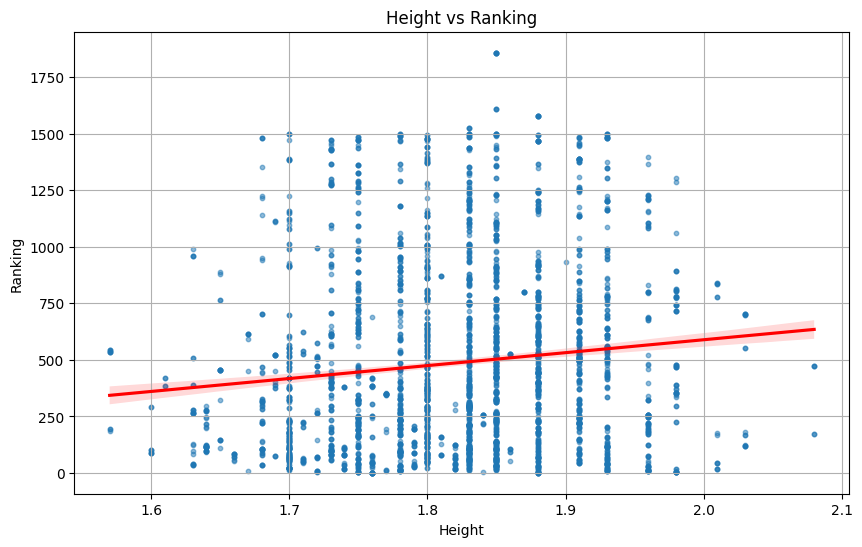

In [46]:
from scipy.stats import pearsonr
home_team = home_team.drop_duplicates()

height_and_rank = home_team[['current_rank', 'height']]
height_and_rank = height_and_rank.dropna()

correlation_coefficient, p_value = pearsonr(height_and_rank['height'], height_and_rank['current_rank'])
print(f"Correlation coefficient between height and ranking: {correlation_coefficient}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

plt.figure(figsize=(10, 6))
sns.regplot(data=height_and_rank, x='height', y='current_rank', scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Height vs Ranking')
plt.xlabel('Height')
plt.ylabel('Ranking')
plt.grid(True)
plt.show()

11. What is the average duration of matches?


In [48]:
match_time_info = time.drop_duplicates(subset=['match_id'])

average_duration = match_time_info[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].sum(axis=1).mean()/60

print(f"Average duration of matches: {average_duration} minutes")

Average duration of matches: 88.59112565725937 minutes


12. What is the average number of games per set in men's matches compared to women's matches?


In [52]:
game_info = pd.merge(pbp, home_team[['match_id', 'gender']], on='match_id')

game_info = game_info.drop_duplicates(subset=['match_id'])

avg_games_per_set = game_info.groupby('gender')['game_id'].mean()

print(f"Average number of games per set:")
print(avg_games_per_set)

Average number of games per set:
gender
F    8.631924
M    8.973021
Name: game_id, dtype: float64


13. What is the distribution of left-handed versus right-handed players?


plays
right-handed    5323
left-handed      779
ambidextrous       7
Chi-Square Test: chi2 = 0.0, p-value = 1.0
There is no significant difference between the number of left-handed and right-handed players.


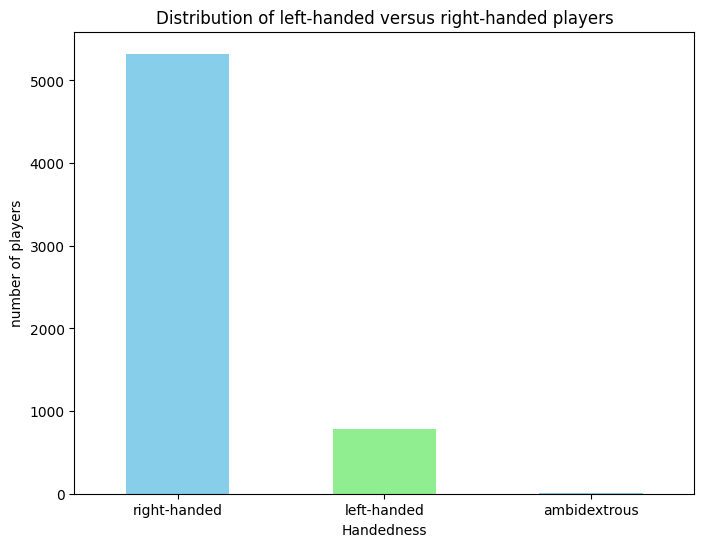

In [51]:
from scipy.stats import chi2_contingency

combined_data = pd.concat([home_team, away_team])

unique_players = combined_data.drop_duplicates(subset=['match_id', 'player_id'])

handedness_distribution = unique_players['plays'].value_counts()

print(handedness_distribution.to_string())

# Chi-square test
observed = handedness_distribution.values
chi2, p, dof, expected = chi2_contingency([observed])

print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p}")
if p < 0.05:
    print("There is a significant difference between left-handed and right-handed players.")
else:
    print("There is no significant difference between the number of left-handed and right-handed players.")

plt.figure(figsize=(8, 6))
handedness_distribution.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of left-handed versus right-handed players')
plt.xlabel('Handedness')
plt.ylabel('number of players')
plt.xticks(rotation=0)
plt.show()

14. What is the most common type of surface used in tournaments?


In [55]:
tournament = tournament.drop_duplicates()

surface_distribution = tournament['ground_type'].value_counts()

print("Most common type of surface used in tournaments:\n", surface_distribution)

most_common = surface_distribution.idxmax()
print("Most common type of surface used in tournaments:\n", most_common)


Most common type of surface used in tournaments:
 ground_type
Red clay             6862
Hardcourt outdoor    2296
Hardcourt indoor      114
Synthetic outdoor      47
Name: count, dtype: int64
Most common type of surface used in tournaments:
 Red clay


15. How many distinct countries are represented in the dataset?


In [58]:
home_team = home_team.drop_duplicates()
away_team = away_team.drop_duplicates()

h_co = set(home_team['country'].unique())
a_co = set(away_team['country'].unique())

distinct_co = set(h_co.union(a_co))
num_distinct_co = len(distinct_co)

print("Number of distinct countries represented in the dataset:\n", num_distinct_co)


Number of distinct countries represented in the dataset:
 97


16. Which player has the highest winning percentage against top 10 ranked opponents?


In [59]:
away_team_relevant = away_team[['match_id', 'player_id', 'current_rank', 'full_name']]
home_team_relevant = home_team[['match_id', 'player_id', 'current_rank', 'full_name']]
event_relevant = event[['match_id', 'winner_code']]

away_team_merged = away_team_relevant.merge(event_relevant, on='match_id')
home_team_merged = home_team_relevant.merge(event_relevant, on='match_id')

away_team_merged = away_team_merged.drop_duplicates(subset=['match_id'])
home_team_merged = home_team_merged.drop_duplicates(subset=['match_id'])

home_team_merged['won'] = home_team_merged['winner_code'] == 1
away_team_merged['won'] = away_team_merged['winner_code'] == 2

combined_df = pd.concat([home_team_merged, away_team_merged])

top_10_matches = combined_df[combined_df['current_rank'] <= 10]

win_loss_records = top_10_matches.groupby('full_name')['won'].agg(['sum', 'count'])
win_loss_records['winning_percentage'] = (win_loss_records['sum'] / win_loss_records['count']) * 100

highest_winning_percentage_player = win_loss_records.loc[win_loss_records['winning_percentage'].idxmax()]

print(highest_winning_percentage_player)


sum                    11.0
count                  11.0
winning_percentage    100.0
Name: Swiatek, Iga, dtype: float64
----------------------------------------------------------------------------------------------------


17. What is the average number of breaks of serve per match?


In [60]:
power_info = power.drop_duplicates(subset=['match_id'])

breaks = power_info.groupby('match_id')['break_occurred'].sum()
avg_breaks_per_match = breaks.mean()

print(f"The average number of breaks of serve per match is: {avg_breaks_per_match:.2f}")

The average number of breaks of serve per match is: 0.51


8.1. How does the average current score of home teams compare to away teams?

In [71]:
home_team_score_info = home_team_score.drop_duplicates(subset=['match_id'])
away_team_score_info = away_team_score.drop_duplicates(subset=['match_id'])


home_avg_score = home_team_score_info['current_score'].mean()
away_avg_score = away_team_score_info['current_score'].mean()

print(f"Average home score: {home_avg_score}")
print(f"Average away score: {away_avg_score}")

Average home score: 1.658111111111111
Average away score: 1.5943333333333334


8.2. How many matches have a home team seed lower than the away team seed?

In [79]:
event_info =  event.drop_duplicates(subset=['match_id'])

count = event_info[event_info['home_team_seed'] < event_info['away_team_seed']].shape[0]

print(f"Number of matches where home team seed is lower than away team seed: {count}")

Number of matches where home team seed is lower than away team seed: 321


8.3. How does the number of games per set vary across different rounds?

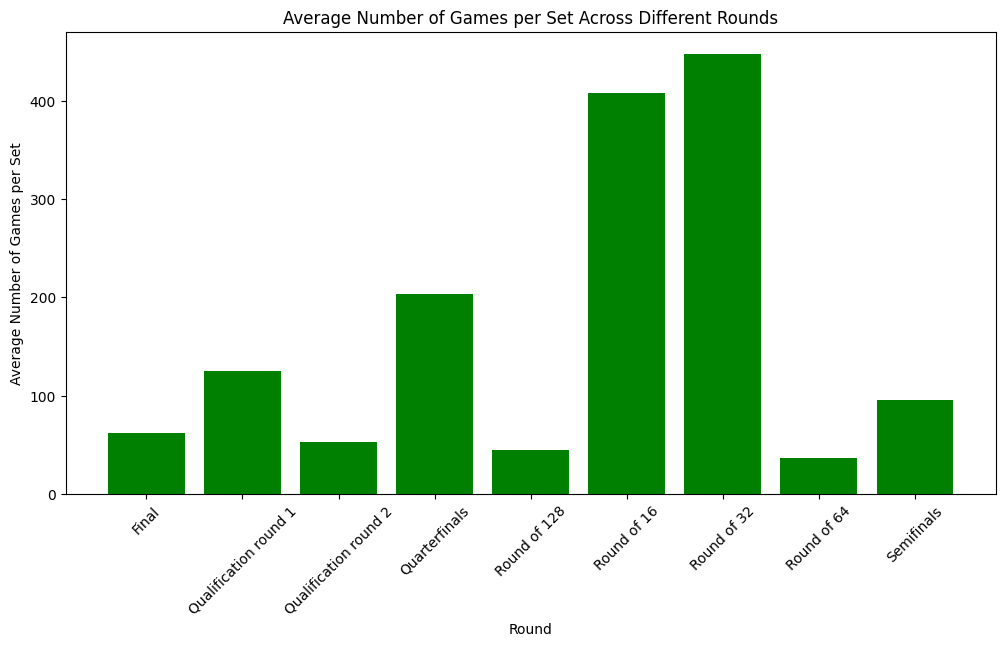

In [81]:
pbp_info =  pbp.drop_duplicates(subset=['match_id'])
round_info = round.drop_duplicates(subset=['match_id'])

merged_df = pd.merge(pbp_info, round_info, on='match_id')

games_per_set = merged_df.groupby(['name', 'set_id']).size().reset_index(name='num_games')

average_games_per_round = games_per_set.groupby('name')['num_games'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(average_games_per_round['name'], average_games_per_round['num_games'], color='green')
plt.xlabel('Round')
plt.ylabel('Average Number of Games per Set')
plt.title('Average Number of Games per Set Across Different Rounds')
plt.xticks(rotation=45)
plt.show()

8.4. Identify the top 5 tournaments with the highest average match duration.

In [91]:

time_info['total_duration'] = time[['period_1', 'period_2', 'period_3', 'period_4', 'period_5']].sum(axis=1)

merged_df = pd.merge(time_info[['match_id', 'total_duration']], tournament[['match_id', 'tournament_name']], on='match_id')
merged_df.drop_duplicates(inplace=True)

avg_duration_per_tournament = merged_df.groupby('tournament_name')['total_duration'].mean().reset_index()

top_5_tournaments = avg_duration_per_tournament.nlargest(5, 'total_duration')

print(top_5_tournaments)

                                       tournament_name  total_duration
94                                    Guangzhou, China    23456.823529
221  S. Margherita di Pula, Singles Main, M-ITF-ITA...    18151.312500
30         Bethany Beach, Singles Main,  W-ITF-USA-16A    16983.612903
252                Toyama, Singles Main, W-ITF-JPN-06A    16188.500000
279               Vrhnika, Singles Main, M-ITF-SLO-03A    15005.800000


8.5. Does the type of ground (grass, clay, hard) affect the result of the match?

In [3]:
from scipy.stats import chi2_contingency

merged_data = pd.merge(event, tournament, on='match_id')

merged_data = merged_data.drop_duplicates()

cross_table = pd.crosstab(merged_data['ground_type'], merged_data['winner_code'])

chi2, p, dof, expected = chi2_contingency(cross_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

alpha = 0.05 
if p < alpha:
    print("There is a significant effect for the type of land.")
else:
    print("The type of ground does not have a significant effect on the result of the match.")

Chi-square statistic: 0.1971287213406607
P-value: 0.9780514840662566
Degrees of freedom: 3
Expected frequencies:
[[  55.81312127   52.18687873]
 [1145.71935056 1071.28064944]
 [3453.17848465 3228.82151535]
 [  24.28904352   22.71095648]]
The type of ground does not have a significant effect on the result of the match.


8.6. Do players' performances vary significantly across different periods of a match?

F-statistic: 7.172366548129136
P-value: 9.14466791943393e-06
There is a significant difference between different periods of the competition.


C:\Users\HP\AppData\Local\Temp\ipykernel_4768\2732949026.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Period', y='Mean Performance', data=data, palette='viridis')


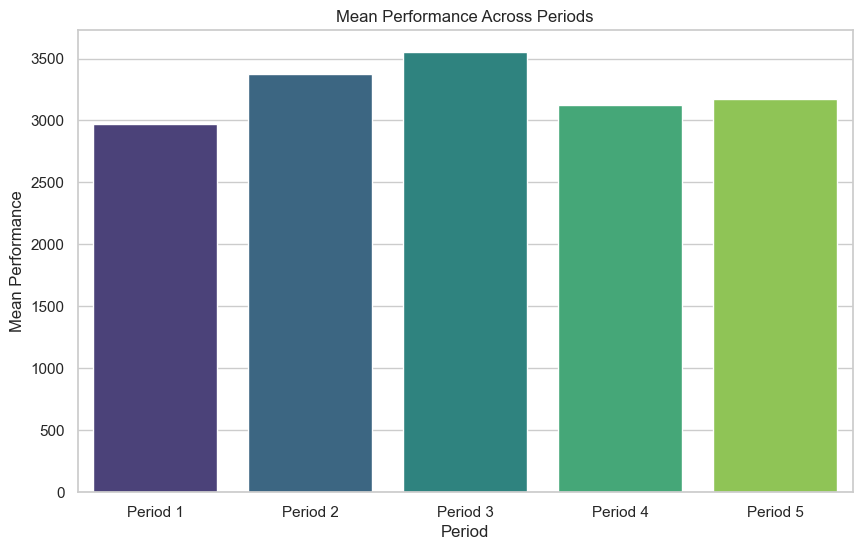

In [9]:
from scipy.stats import f_oneway

period_info = time.drop_duplicates()

# Necessary components to perform the ANOVA test
period_1 = period_info['period_1'].dropna()
period_2 = period_info['period_2'].dropna()
period_3 = period_info['period_3'].dropna()
period_4 = period_info['period_4'].dropna()
period_5 = period_info['period_5'].dropna()

# ANOVA test
f_statistic, p_value = f_oneway(period_1, period_2, period_3, period_4, period_5)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("There is a significant difference between different periods of the competition.")
else:
    print("There is no significant difference between different periods of the competition.")

data = pd.DataFrame({
    'Period': ['Period 1', 'Period 2', 'Period 3', 'Period 4', 'Period 5'],
    'Mean Performance': [
        period_info['period_1'].mean(),
        period_info['period_2'].mean(),
        period_info['period_3'].mean(),
        period_info['period_4'].mean(),
        period_info['period_5'].mean()
    ]
})

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Period', y='Mean Performance', data=data, palette='viridis')

plt.title('Mean Performance Across Periods')
plt.xlabel('Period')
plt.ylabel('Mean Performance')
plt.show()

8.7. Find the highest score achieved by each home team and away team in each period.

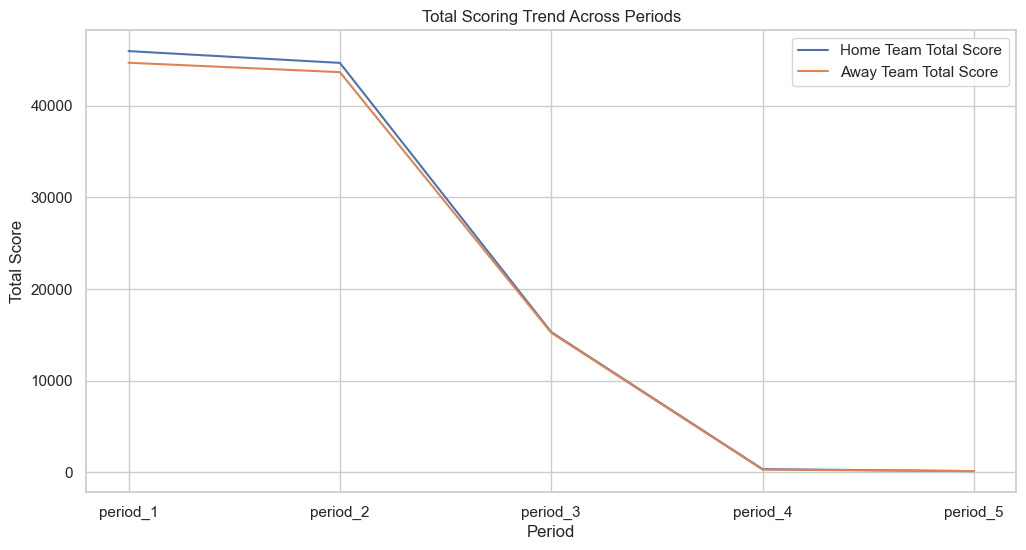

In [5]:
home_scores = home_team_score.melt(id_vars=['match_id'], value_vars=['period_1', 'period_2', 'period_3', 'period_4', 'period_5'],
                                         var_name='period', value_name='home_score')
away_scores = away_team_score.melt(id_vars=['match_id'], value_vars=['period_1', 'period_2', 'period_3', 'period_4', 'period_5'],
                                         var_name='period', value_name='away_score')

scores = home_scores.merge(away_scores, on=['match_id', 'period'], suffixes=('_home', '_away'))

scores = scores.drop_duplicates()


plt.figure(figsize=(12, 6))
plt.plot(scores.groupby('period')['home_score'].sum(), label='Home Team Total Score')
plt.plot(scores.groupby('period')['away_score'].sum(), label='Away Team Total Score')
plt.xlabel('Period')
plt.ylabel('Total Score')
plt.title('Total Scoring Trend Across Periods')
plt.legend()
plt.show()

8.8. Which tournament had the highest average attendance?

In [6]:
tour_attend = tournament[['tournament_name', 'user_count']]
average_attendance = tour_attend.groupby('tournament_name')['user_count'].mean().idxmax()
print(average_attendance)

French Open, Paris, France
